# task -5
# SALES PREDECTION USING PYTHON

In [2]:
import numpy as np
import pandas as pd
data=pd.read_csv("Advertising.csv")
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.shape

(200, 5)

In [7]:
data.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
data.isnull().sum()*100/data.shape[0]

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

In [10]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      Unnamed: 0     TV  Radio  Newspaper  Sales
0         False  False  False      False  False
1         False  False  False      False  False
2         False  False  False      False  False
3         False  False  False      False  False
4         False  False  False      False  False
..          ...    ...    ...        ...    ...
195       False  False  False      False  False
196       False  False  False      False  False
197       False  False  False      False  False
198       False  False  False      False  False
199       False  False  False      False  False

[200 rows x 5 columns]>

In [11]:
## fltering out numerical columns from the dataset?

data_numerical = data.select_dtypes(include = [np.number])
data_numerical
# include = [np.number]

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [12]:
# filtering the categerical column:
from warnings import filterwarnings
filterwarnings("ignore")
data_cat = data.select_dtypes(include = [np.object])
data_cat

""
0
1
2
3
4
...
195
196
197
198


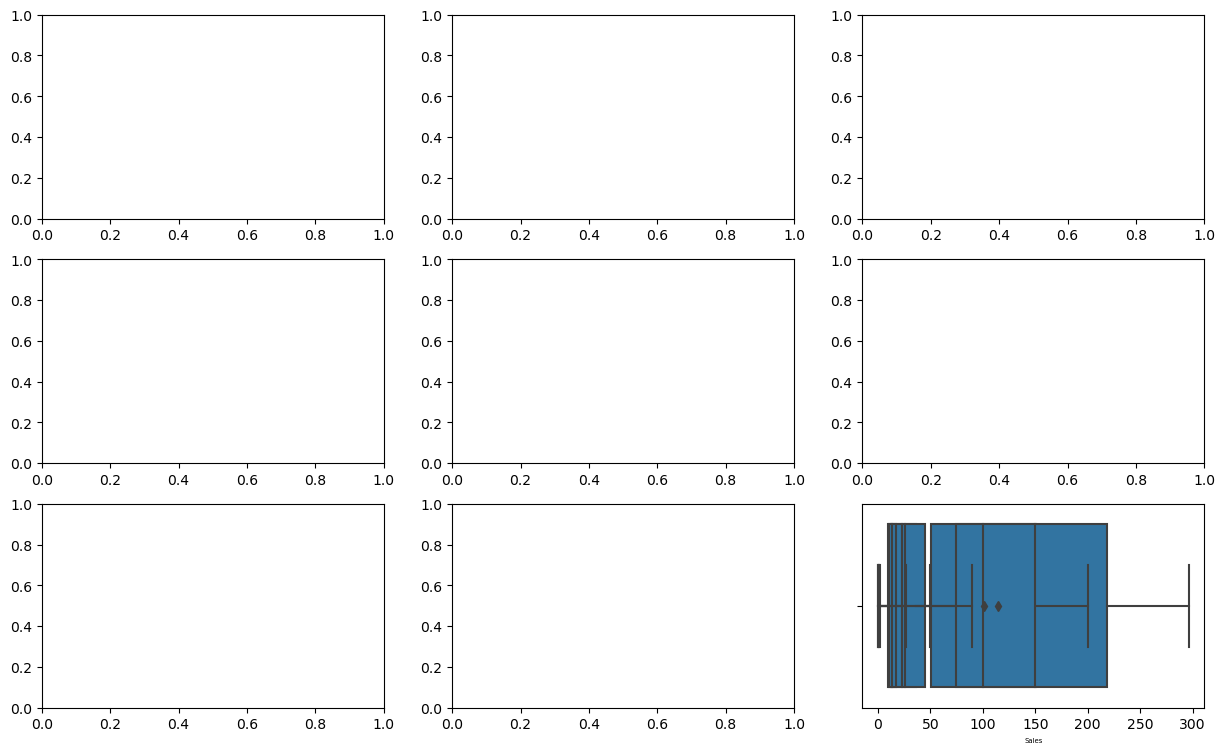

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(3,3,figsize = (15,9))
for variable,subplot in zip(data_numerical.columns,ax.flatten()):
    z = sns.boxplot(x=data_numerical[variable],orient = 'h',whis = 1.5)
    z.set_xlabel(variable,fontsize = 5)


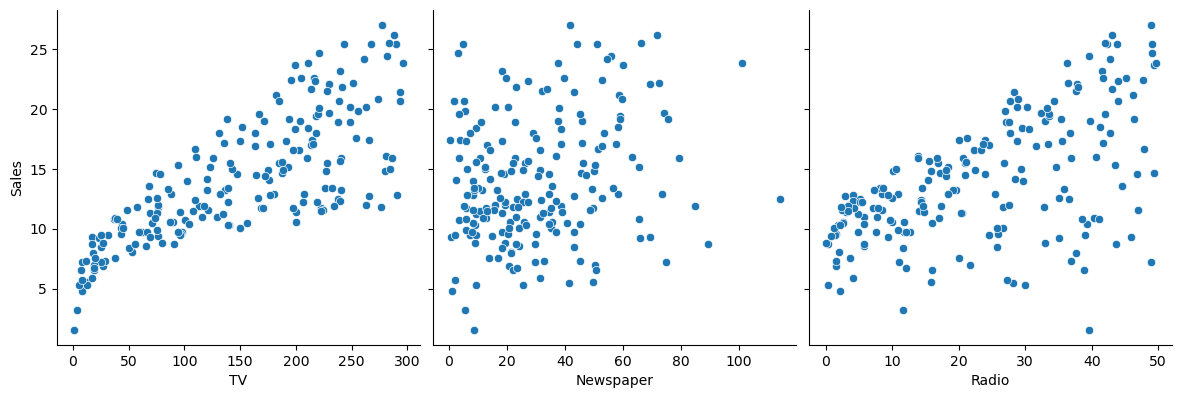

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

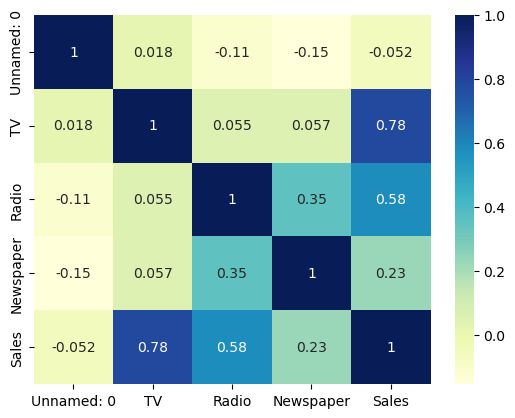

In [21]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# SPLITTING THE DATA INTO TRAIN AND TEST DATa

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain, xtest, ytrain , ytest = train_test_split(data.drop("Sales",axis=1),data["Sales"], train_size = .75)

In [24]:
xtrain.shape

(150, 4)

In [25]:
ytrain.shape

(150,)

In [26]:
xtest.shape

(50, 4)

In [27]:
ytest.shape

(50,)

In [29]:
xtrain.head()

,Unnamed: 0,TV,Radio,Newspaper
154,155,187.8,21.1,9.5
142,143,220.5,33.2,37.9
83,84,68.4,44.5,35.6
153,154,171.3,39.7,37.7
103,104,187.9,17.2,17.9


In [31]:
ytrain.head()

154    15.6
142    20.1
83     13.6
153    19.0
103    14.7
Name: Sales, dtype: float64

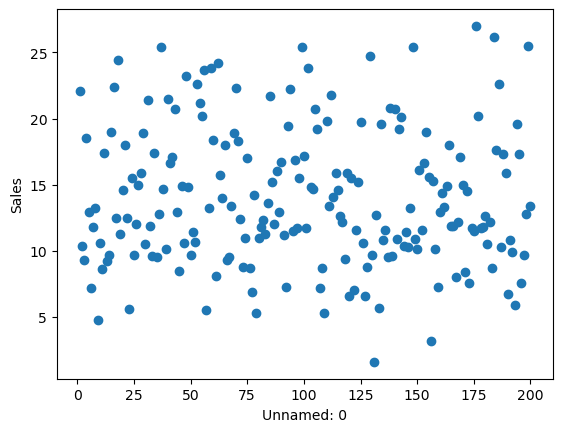

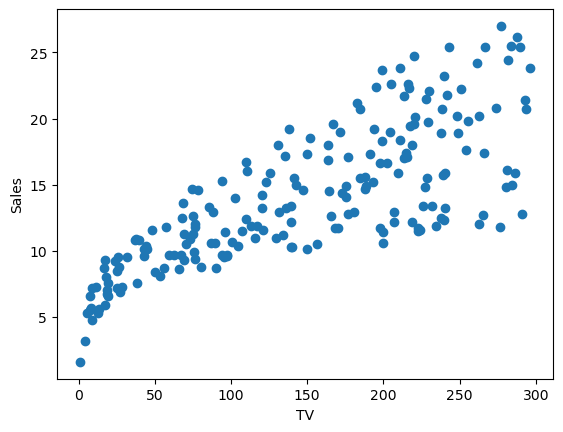

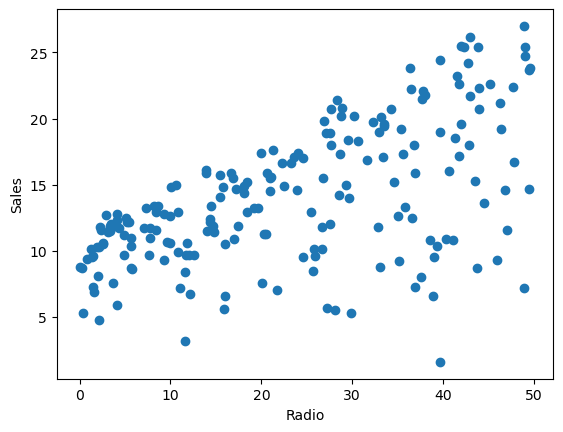

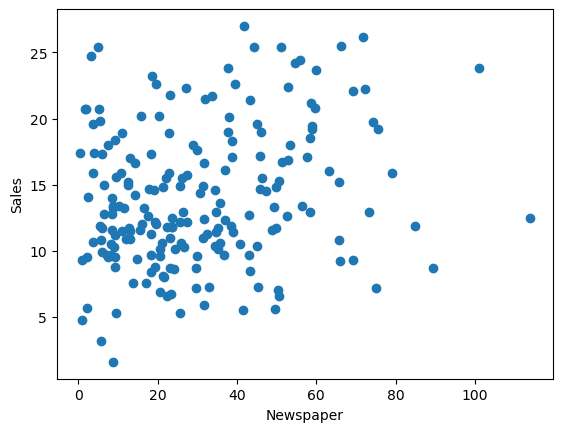

In [32]:
for i in data.columns[:-1]:
    plt.xlabel(i)
    plt.ylabel("Sales")
    plt.scatter(data[i][:300],data["Sales"][:300])
    plt.show()